In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.keras as keras

In [9]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [4]:
from sklearn.model_selection import train_test_split
'''
train.iloc[:, 1:] will get the data without the label
train.iloc[:,0] will only get the label
test_size will split the size of the data proportonially to 10% or 0.1
random_state is a constant value while train_test_split, shuffle the dataset
'''
#train.iloc[:, 1:] will get the data without the label
X_train, X_valid, y_train, y_valid = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.1, random_state=42)
X_test, y_test = test.iloc[:,1:], test.iloc[:,0]


X_train = X_train.values.reshape(-1,28,28,1) / 255.0
X_valid = X_valid.values.reshape(-1,28,28,1) / 255.0
X_test = X_test.values.reshape(-1,28,28,1) / 255.0

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=25, activation='softmax'),
])

In [6]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = 'nadam',
    metrics=['accuracy']
)

In [7]:
history = model.fit(X_train,y_train,
                   validation_data=(X_valid,y_valid),
                   epochs=10,)

Epoch 1/10
773/773 [==============================] - 60s 76ms/step - loss: 3.1597 - accuracy: 0.0527 - val_loss: 2.1670 - val_accuracy: 0.2808
Epoch 2/10
773/773 [==============================] - 69s 90ms/step - loss: 1.3971 - accuracy: 0.5046 - val_loss: 0.1453 - val_accuracy: 0.9629
Epoch 3/10
773/773 [==============================] - 54s 69ms/step - loss: 0.3632 - accuracy: 0.8748 - val_loss: 0.0390 - val_accuracy: 0.9840
Epoch 4/10
773/773 [==============================] - 49s 64ms/step - loss: 0.1790 - accuracy: 0.9406 - val_loss: 0.0345 - val_accuracy: 0.9931
Epoch 5/10
773/773 [==============================] - 52s 67ms/step - loss: 0.1066 - accuracy: 0.9657 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 6/10
773/773 [==============================] - 54s 70ms/step - loss: 0.1128 - accuracy: 0.9673 - val_loss: 6.9364e-04 - val_accuracy: 0.9996
Epoch 7/10
773/773 [==============================] - 55s 71ms/step - loss: 0.0827 - accuracy: 0.9744 - val_loss: 4.8514e-04 - val_a

Epoch 1/3
551/551 [==============================] - 25796s 47s/step - loss: 1.0432 - accuracy: 0.7110 - val_loss: 0.1247 - val_accuracy: 0.9591
Epoch 2/3
551/551 [==============================] - 1440s 3s/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.0527 - val_accuracy: 0.9834
Epoch 3/3
551/551 [==============================] - 1454s 3s/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0139 - val_accuracy: 0.9958
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)    

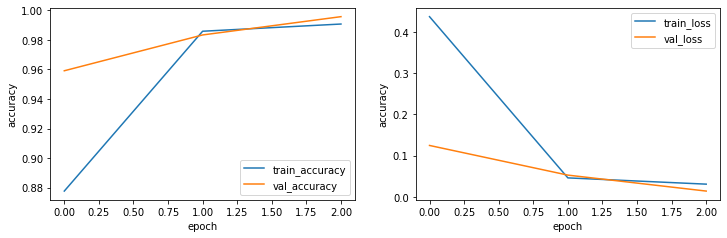

272/272 [==============================] - 26s 96ms/step - loss: 0.0104 - accuracy: 0.9974

Train time:  28689.490270853043
Test accuracy: 0.9973562955856323
Test loss: 0.010410904884338379
Test time:  26.08879590034485


In [11]:
model = Sequential()

model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))

model.add(Flatten())

model.add(Dense(512, activation='sigmoid'))

model.add(Dense(29, activation='softmax'))

results(model)

0 R
1 U
2 I
3 N
4 G
5 Z
6 T
7 S
8 A
9 F
10 O
11 H
12 del
13 nothing
14 space
15 M
16 J
17 C
18 D
19 V
20 Q
21 X
22 E
23 B
24 K
25 L
26 Y
27 P
28 W
Loaded 781 images for training, Train data shape = (781, 32, 32, 3)
Loaded 87 images for testing Test data shape = (87, 32, 32, 3)
28


(array([[[[0.6392157 , 0.63529414, 0.6509804 ],
          [0.6117647 , 0.60784316, 0.62352943],
          [0.5686275 , 0.5647059 , 0.5803922 ],
          ...,
          [0.26666668, 0.3254902 , 0.36078432],
          [0.25490198, 0.3137255 , 0.34901962],
          [0.25882354, 0.30980393, 0.34117648]],
 
         [[0.7254902 , 0.72156864, 0.7372549 ],
          [0.6862745 , 0.68235296, 0.69803923],
          [0.6392157 , 0.63529414, 0.6509804 ],
          ...,
          [0.25882354, 0.32156864, 0.34901962],
          [0.25882354, 0.32156864, 0.34509805],
          [0.25490198, 0.30980393, 0.33333334]],
 
         [[0.827451  , 0.8117647 , 0.827451  ],
          [0.78039217, 0.7647059 , 0.78431374],
          [0.73333335, 0.7176471 , 0.7372549 ],
          ...,
          [0.27058825, 0.33333334, 0.36078432],
          [0.25490198, 0.31764707, 0.34117648],
          [0.2509804 , 0.31764707, 0.34117648]],
 
         ...,
 
         [[0.99215686, 1.        , 1.        ],
          [0.98039

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Loss = ",loss,"\nAccuracy = ",accuracy)

272/272 [==============================] - 26s 97ms/step - loss: 0.0104 - accuracy: 0.9974
Loss =  0.010410904884338379 
Accuracy =  0.9973562955856323


In [67]:
train_dir = '/Users/availablenow/Downloads/asl_alphabet_train'
x_train, x_test, y_train, y_test, labels = load_data(train_dir)

0 R
1 U
2 I
3 N
4 G
5 Z
6 T
7 S
8 A
9 F
10 O
11 H
12 del
13 nothing
14 space
15 M
16 J
17 C
18 D
19 V
20 Q
21 X
22 E
23 B
24 K
25 L
26 Y
27 P
28 W
Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
28


In [ ]:
model = Sequential()

model.add(VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3)))

model.add(Flatten())

model.add(Dense(512, activation='sigmoid'))

model.add(Dense(29, activation='softmax'))

results(model)

Epoch 1/20
551/551 [==============================] - 1472s 3s/step - loss: 1.0465 - accuracy: 0.7093 - val_loss: 0.1088 - val_accuracy: 0.9663
Epoch 2/20
551/551 [==============================] - 1516s 3s/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0165 - val_accuracy: 0.9960
Epoch 3/20
469/551 [========================>.....] - ETA: 3:35 - loss: 0.0280 - accuracy: 0.9925

In [64]:
def load2_data(train_dir,test_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.scandir(test_dir) and folder in os.scandir(train_dir):
        if folder.is_dir() and entry.is_dir():
            index +=1
            print(index, folder.name)
            for image in os.scandir(test_dir + "/" + folder.name):
                if image.is_file() and ".jpg" in image.name:
                    temp_img = cv2.imread(test_dir + '/' + folder.name + '/' + image.name)
                    temp_img = cv2.resize(temp_img, size)
                    images.append(temp_img)
                    labels.append(index)
            for image2 in os.scandir(train_dir + "/" + folder.name):
                if image2.is_file() and ".jpg" in image.name:
                    temp_img2 = cv2.imread(train_dir + '/' + folder.name + '/' + image.name)
                    temp_img2 = cv2.resize(temp2_img, size)
                    images.append(temp2_img)
                    labels = labels(index)
                    #print(index, folder.name)
    index = -1
    for folder in os.scandir(train_dir):
        if folder.is_dir():
            index +=1
            print(index, folder.name)
            for image in os.scandir(train_dir + "/" + folder.name):
                if image.is_file() and ".jpg" in image.name:
                    temp_img = cv2.imread(train_dir + '/' + folder.name + '/' + image.name)
                    temp_img = cv2.resize(temp_img, size)
                    images.append(temp_img)
                    labels = labels(index)
                    #print(index, folder.name)
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    print(index)
    return x_train, x_test, y_train, y_test, labels
test_dir = '/Users/availablenow/Downloads/asl_test_images'
start = time()
x_train, x_test, y_train, y_test = load2_data(train_dir,test_dir)
print('Loading:', time() - start)
print(x_test.shape)
print(y_train.shape)
#load_data(test_dir)


UnboundLocalError: local variable 'folder' referenced before assignment

In [45]:

loss, accuracy = model.evaluate(x2_test, y2_test)

print("Loss = ",loss,"\nAccuracy = ",accuracy)

28/28 [==============================] - 3s 117ms/step - loss: 3.9914 - accuracy: 0.3629
Loss =  3.991384506225586 
Accuracy =  0.3629032373428345


In [65]:
#https://machinelearningmastery.com/object-recognition-with-deep-learning/
#https://towardsdatascience.com/object-detection-with-neural-networks-a4e2c46b4491
#https://www.pyimagesearch.com/2020/10/05/object-detection-bounding-box-regression-with-keras-tensorflow-and-deep-learning/


In [66]:
model = Sequential([
        Dense(200, input_dim=64), 
        Activation('relu'), 
        Dropout(0.2), 
        Dense(4)
    ])
model.compile('adadelta', 'mse')


NameError: name 'Activation' is not defined

In [ ]:
# load yolov3 model
model = load_model('model.h5')